Loading a Kaggle Dataset into Colab

In [1]:
# Upload a Kaggle Json File(Kaggle API Key)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saiprasannaudara","key":"37b86a60baaae9092bd188384a5aa2c0"}'}

In [2]:
# Kaggle Credentials Path
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# Install Kaggle Python Libraries
!pip install kaggle

# Set Permissions
!chmod 600 /content/kaggle.json

In [3]:
# Dataset download
!kaggle datasets download nicapotato/womens-ecommerce-clothing-reviews

Dataset URL: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews
License(s): CC0-1.0
  0% 0.00/2.79M [00:00<?, ?B/s]
100% 2.79M/2.79M [00:00<00:00, 316MB/s]


In [4]:
# Unzip the downloaded file
!unzip womens-ecommerce-clothing-reviews.zip

Archive:  womens-ecommerce-clothing-reviews.zip
  inflating: Womens Clothing E-Commerce Reviews.csv  


Importing Required Libraries and loading the data into Dataframe

In [5]:
# Importing pandas, numpy and matplot libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the data
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

Step-1 : Exploratory Data Analysis

(a)DataSet Structure Analysis

In [7]:
# Dataset Structure
# Print Shape of the data
print(f"shape: {df.shape}")

# Print Number of rows and columns
print(f"Number of Rows: {df.shape[0]:}")
print(f"Number of Columns: {df.shape[1]}")

# Print Column Names
print(f"Header Columns: {df.columns.tolist()}")

shape: (23486, 11)
Number of Rows: 23486
Number of Columns: 11
Header Columns: ['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']


In [8]:
# Print first five rows
print(f"First Five rows:")
df.head()

First Five rows:


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


(b) Datatype Analysis

In [9]:
# Print the data types
print(df.dtypes.value_counts())
print(f"data types:\n{df.dtypes}")

int64     6
object    5
Name: count, dtype: int64
data types:
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object


In [10]:
#print Text columns and Numeric Columns
text_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['int64']).columns

print(f"Text Columns:\n {text_columns.tolist()}")
print(f"Numeric Columns:\n {numeric_columns.tolist()}")

Text Columns:
 ['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']
Numeric Columns:
 ['Unnamed: 0', 'Clothing ID', 'Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']


(C) Missing Value Analysis

In [11]:
# Missing Values Analysis
print(f"Missing Null Values:\n{df.isnull().sum()}")

Missing Null Values:
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


(d) Duplicate records

In [12]:
# Print number of records in Review text column
print(f"Number of Review texts: {len(df['Review Text'])}")

# Duplicate records in review text column
if 'Review Text' in df.columns:
    text_duplicates = df['Review Text'].duplicated().sum()
    print(f"Duplicate Text Reviews: {text_duplicates}")

Number of Review texts: 23486
Duplicate Text Reviews: 851


(e) Rating Distribution

In [13]:
# Print number of records in Rating Column
print(f"Number of Ratings: {len(df['Rating'])}")

Number of Ratings: 23486


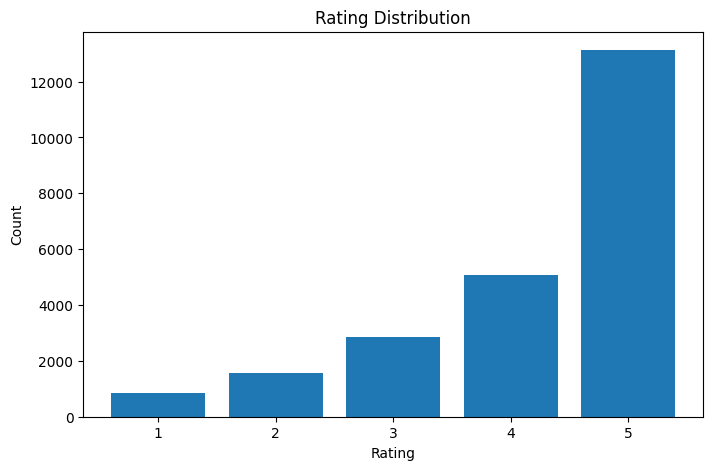

In [14]:
# Visualize the Rating Distribution
rating_counts = df['Rating'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(rating_counts.index, rating_counts.values)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

(f) Brand Analysis

In [15]:
# Print number of unique records of Clothing ID
unique_ID = len(df['Clothing ID'].unique())
len_Clothing_ID = len(df['Clothing ID'])

print(f"Number of clothing ID's: {len_Clothing_ID}")
print(f"Number of Unique Clothing ID's: {unique_ID}")

Number of clothing ID's: 23486
Number of Unique Clothing ID's: 1206


Top brands by Review Count: 
 Clothing ID
1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
Name: count, dtype: int64


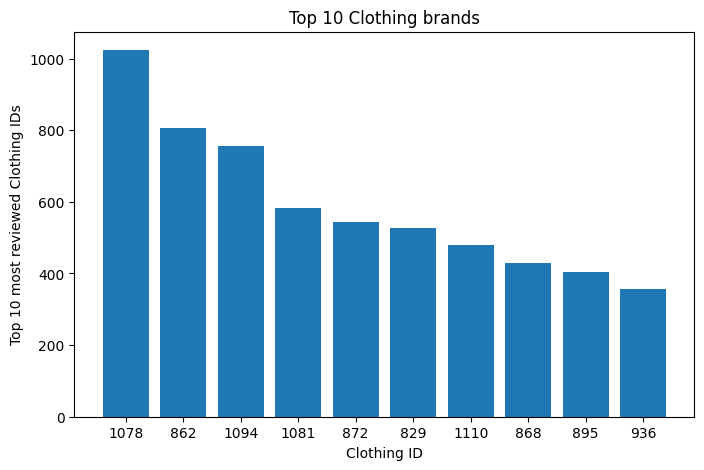

In [16]:
top_10_ids = df['Clothing ID'].value_counts().head(10)
print(f"Top brands by Review Count: \n {top_10_ids}")
plt.figure(figsize=(8,5))
plt.bar(top_10_ids.index.astype(str), top_10_ids.values)
plt.title('Top 10 Clothing brands')
plt.xlabel('Clothing ID')
plt.ylabel('Top 10 most reviewed Clothing IDs')
plt.show()

(g) Correlation Analysis

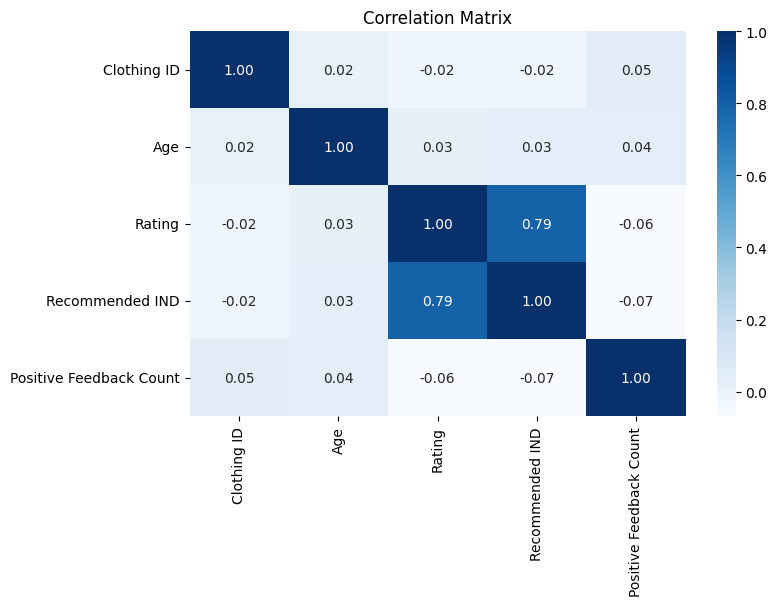

In [17]:
# Correlation matrix for numeric columns

# Select numeric columns except first column
numeric_df = df.select_dtypes(include=np.number).drop(columns='Unnamed: 0')

# Plot correlation matirx
if len(numeric_df.columns)>1:
    plt.figure(figsize=(8,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

(h) Text Content Analysis

In [18]:
# Import required packages and libraries
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
# Combine all text
all_text = ''.join(df['Review Text'].astype(str))

# Remove stop wrods
stop_words = set(stopwords.words('english'))

# Count words
words = [word.lower() for word in all_text.split() if word.lower()
not in stop_words and len(word) > 2]
word_count = Counter(words)

# Print most common words
print("Most Common Words:")
for word, count in word_count.most_common(20):
    print(f"{word} : {count}")

Most Common Words:
dress : 7747
love : 7350
size : 6757
like : 6675
wear : 5883
fit : 5847
top : 4994
would : 4964
great : 4567
really : 3772
fabric : 3760
little : 3710
ordered : 3697
look : 3399
color : 3238
small : 3072
one : 2986
bought : 2807
looks : 2766
fits : 2712


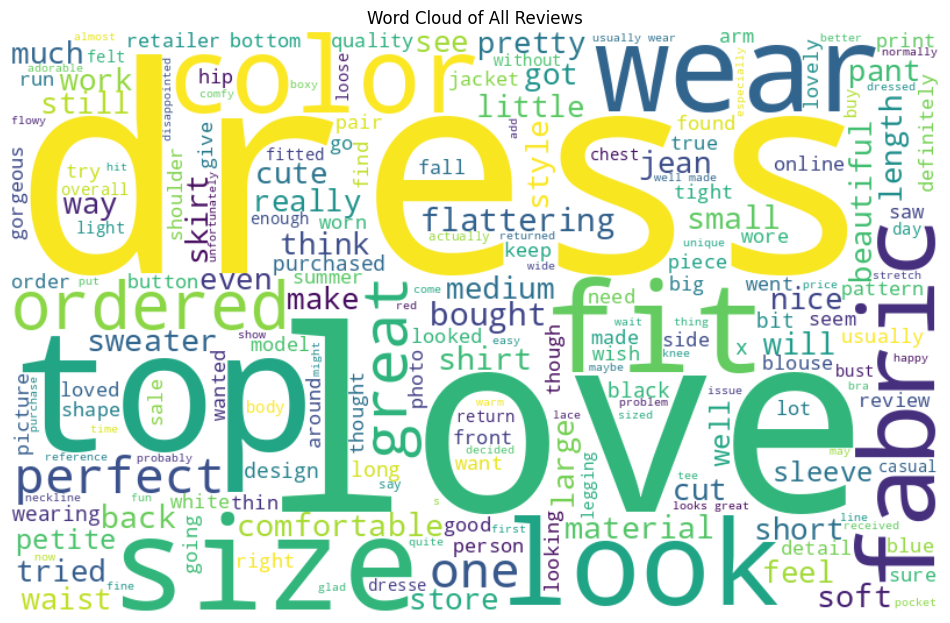

In [20]:
# Import libraries for word cloud
from wordcloud import WordCloud

# Create word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=500, background_color='white')\
.generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Reviews')
plt.show()

(i) Satisfaction Analysis

In [21]:
# Define a function called satisfaction level
def satisfaction_level(Rating):
    if Rating >= 4:
        return 'Satisfied'
    elif Rating == 3:
        return 'Neutral'
    else:
        return 'Dissatisfied'

df['Satisfaction'] = df['Rating'].apply(satisfaction_level)

print("Customer Satisfaction Distribution: ")
df['Satisfaction'].value_counts()

Customer Satisfaction Distribution: 


,count
Satisfaction,
Satisfied,18208
Neutral,2871
Dissatisfied,2407


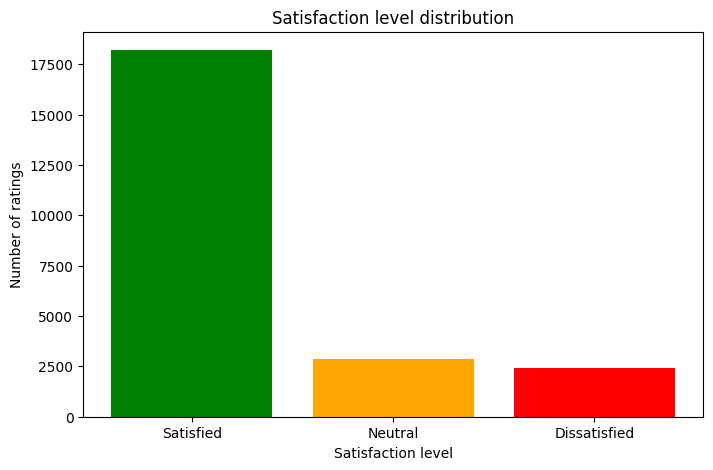

In [22]:
# Plot the distribution of satisfaction level
Satisfaction_counts = df['Satisfaction'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(Satisfaction_counts.index, Satisfaction_counts.values, color =
 ['green','orange','red'])
plt.xlabel('Satisfaction level')
plt.ylabel('Number of ratings')
plt.title('Satisfaction level distribution')
plt.show()

Step-2 : Data Cleaning and preprocessing

(a) Remove Missing data

In [23]:
#Remove Missing data from Review text column
df = df.dropna(subset = ['Review Text'])

#Review Missing data from Rating column
df = df.dropna(subset = ['Rating'])

len(df)

22641

(b) Remove Duplicates

In [24]:
# Drop Duplicates
df = df.drop_duplicates()
len(df)

22641

(c) Remove Invalid data

In [25]:
# Remove invalid ratings from rating column
valid_ratings = df['Rating'].between(1,5)
df = df[valid_ratings]
print(f"Removed {(~valid_ratings).sum()} rows with invalid ratings")

Removed 0 rows with invalid ratings


(d) Text Cleaning

In [26]:
# Import required libraries for text cleaning
import re
import string

# Create a function to clean the text
def clean_text(text):
    """ Clean text data for sentiment analysis """
    text = str(text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '',
                  text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s\.\!\?\,]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text
df['cleaned text'] = df['Review Text'].apply(clean_text)
print("Cleaning Examples:")
for i in range(3):
    print(f"Original: {df['Review Text'].iloc[i][:100]}...")
    print(f"Cleaned: {df['cleaned text'].iloc[i][:100]}...")
    print("-" *50)

Cleaning Examples:
Original: Absolutely wonderful - silky and sexy and comfortable...
Cleaned: absolutely wonderful silky and sexy and comfortable...
--------------------------------------------------
Original: Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never...
Cleaned: love this dress! its sooo pretty. i happened to find it in a store, and im glad i did bc i never wou...
--------------------------------------------------
Original: I had such high hopes for this dress and really wanted it to work for me. i initially ordered the pe...
Cleaned: i had such high hopes for this dress and really wanted it to work for me. i initially ordered the pe...
--------------------------------------------------


(e) Text processing with NLTK

In [33]:
# Install and setup NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [34]:
# Tokenization and Stopword Removal
def process_text(text):
    """Advanced Text Processing: Tokenization, Stopword Removal,
    lemmatization"""

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))

    # Filter stopwords and short words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and len(word) > 2]

    # Lemmitization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Join back into text
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [36]:
# Example Processing Text
df['processed_text'] = df['cleaned text'].apply(process_text)
print("Processing Examples:")
for i in range(3):
    print(f"Cleaned: {df['cleaned text'].iloc[i][:100]}...")
    print(f"Processed: {df['processed_text'].iloc[i][:100]}...")
    print("-" *50)

Processing Examples:
Cleaned: absolutely wonderful silky and sexy and comfortable...
Processed: absolutely wonderful silky sexy comfortable...
--------------------------------------------------
Cleaned: love this dress! its sooo pretty. i happened to find it in a store, and im glad i did bc i never wou...
Processed: love dress sooo pretty happened find store glad never would ordered online petite bought petite 58. ...
--------------------------------------------------
Cleaned: i had such high hopes for this dress and really wanted it to work for me. i initially ordered the pe...
Processed: high hope dress really wanted work initially ordered petite small usual size found outrageously smal...
--------------------------------------------------


(f) Feature Engineering

In [37]:
# Text length Features
df['text_length'] = df['cleaned_text'].str.len()
df['word_count'] = df['cleaned_text'].str.split().str.len()
df['avg_word_length'] = df['text_length']/df['word_count']

# Count Features
df['exclamation_count'] = df['cleaned_text'].str.count('!')
df['question_count'] = df['cleaned_text'].str.count('\?')
df['uppercase_count'] = df['review_text'].str.count(r'[A-Z]')

# Sentiment-related features
df['positive_words'] = df['cleaned_text'].str.count(r'\b(good|great|excellent|amazing|love|perfect)\b')
df['negative_words'] = df['cleaned_text'].str.count(r'\b(bad|terrible|awful|hate|worst|horrible)\b')

print("Feature Engineering Results:")
print(df[['text_length', 'word_count', 'positive_words', 'negative_words']].describe())

KeyError: 'cleaned_text'